In [1]:
!pip install pandas scikit-learn matplotlib joblib


In [2]:
import pandas as pd
username = 'Narayanan'
file_path = f'C:/Users/{username}/Desktop/Engineering/7th SEM/Covid Data.csv'

df = pd.read_csv(file_path)

df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97    194475
           1       0.65      0.51      0.57     15240

    accuracy                           0.94    209715
   macro avg       0.81      0.74      0.77    209715
weighted avg       0.94      0.94      0.94    209715

Confusion Matrix:
 [[190323   4152]
 [  7462   7778]]


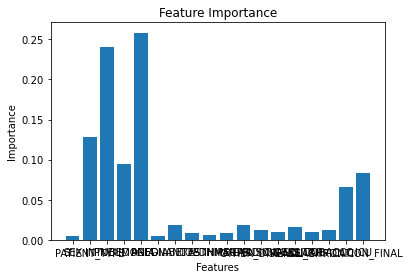

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


# Data Preprocessing
df['DATE_DIED'] = df['DATE_DIED'].apply(lambda x: 1 if x != '9999-99-99' else 0)
df = df.drop(['USMER', 'MEDICAL_UNIT'], axis=1)
df = df.dropna()

# Feature Selection
X = df.drop('DATE_DIED', axis=1)
y = df['DATE_DIED']



# Model Selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using RandomForestClassifier as an example
model = RandomForestClassifier()
model.fit(X_train, y_train)



# Evaluation
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualization
feature_importances = model.feature_importances_
features = X.columns

plt.bar(features, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()




In [5]:
import joblib
joblib.dump(model, 'C:/Users/Narayanan/Desktop/Engineering/7th SEM/covid_severity_model.joblib')


['C:/Users/Narayanan/Desktop/Engineering/7th SEM/covid_severity_model.joblib']

In [8]:
from sklearn.metrics import accuracy_score

# Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print Accuracy
print(f"Accuracy: {accuracy:.2%}")




Accuracy: 94.46%
